# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

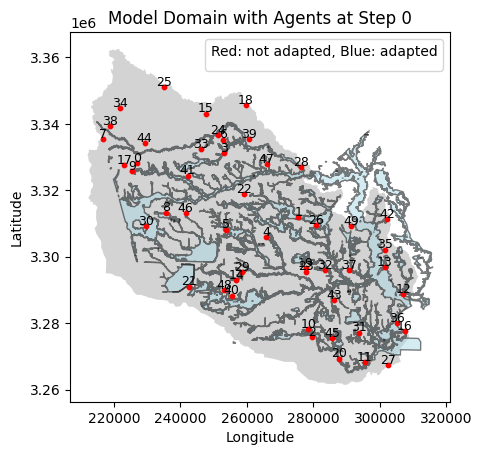

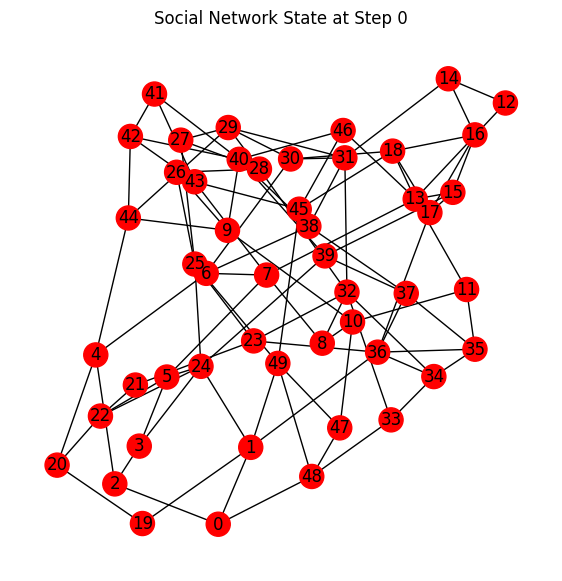

<Figure size 1000x600 with 0 Axes>

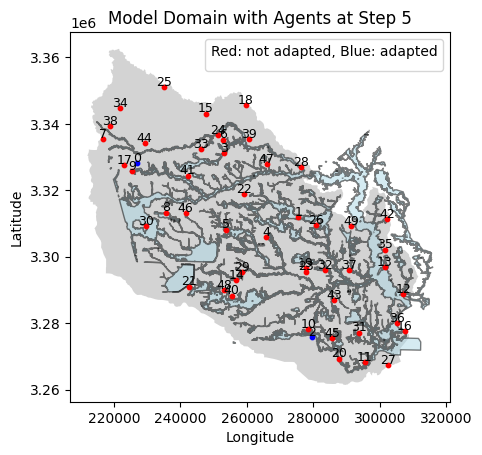

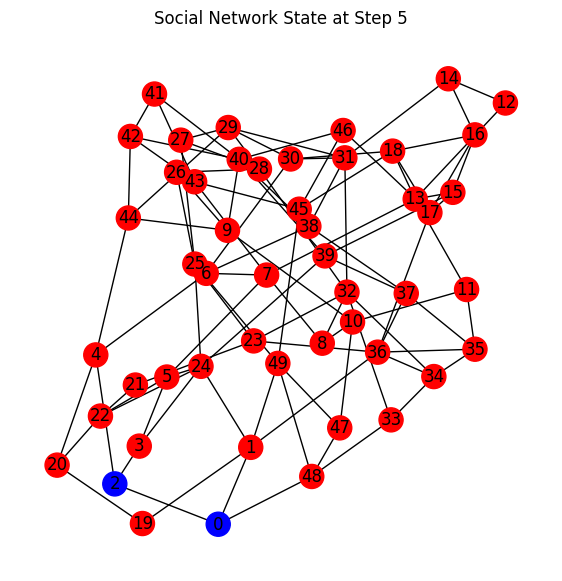

<Figure size 1000x600 with 0 Axes>

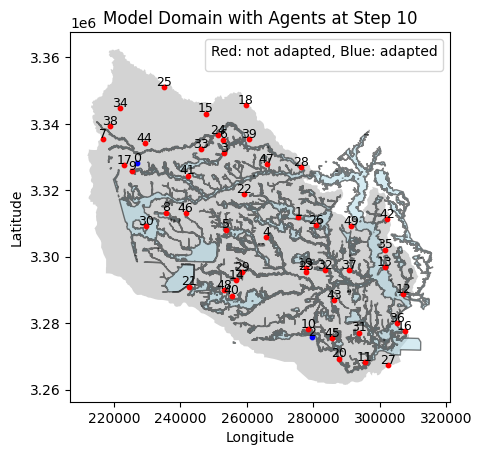

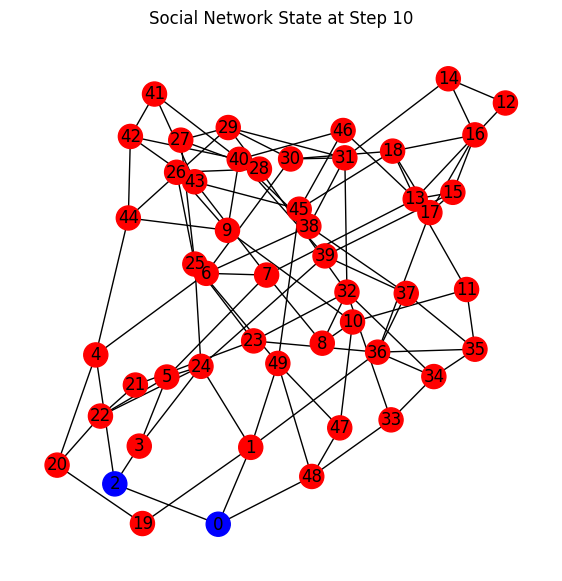

<Figure size 1000x600 with 0 Axes>

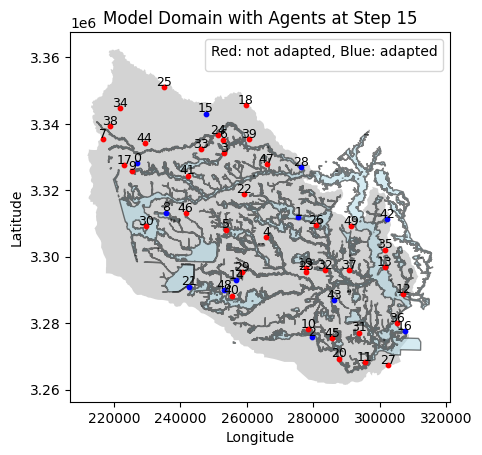

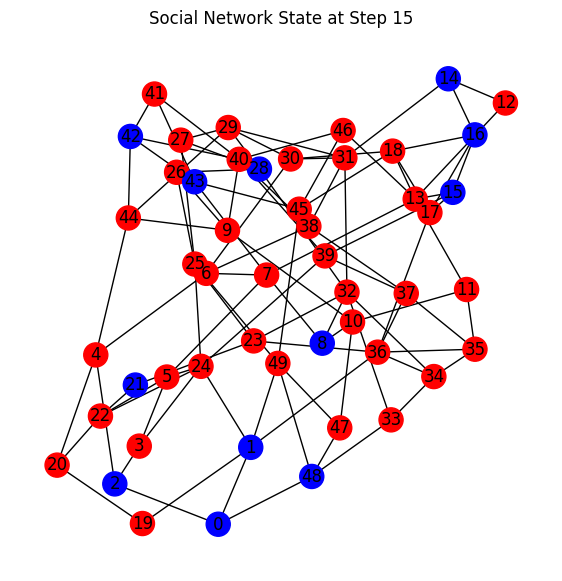

<Figure size 1000x600 with 0 Axes>

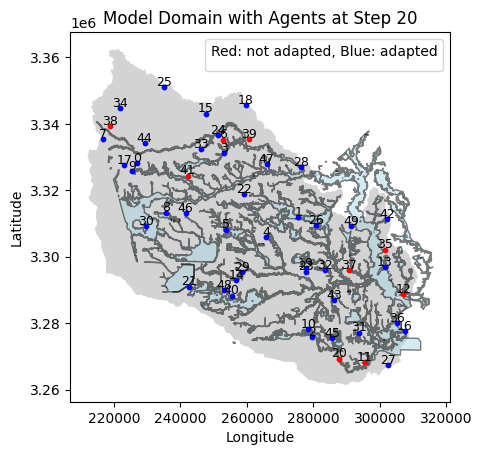

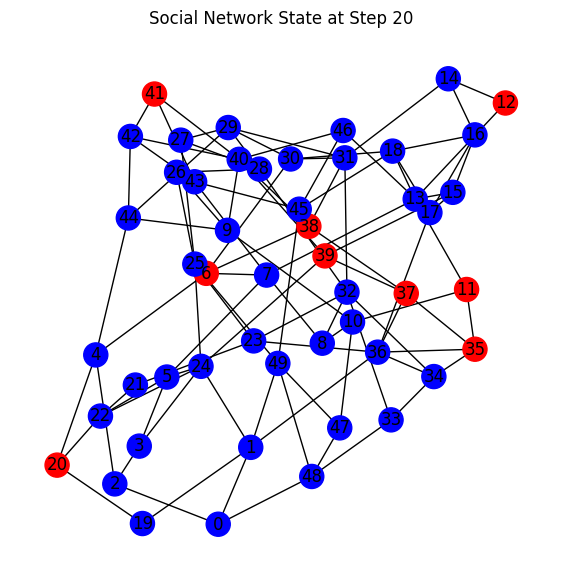

In [9]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz", I_threshold=50000, policy=1.0) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



In [10]:
#random seed blijft het zelfde bij sensitivity analyse
#model = AdaptationModel(number_of_households=50, flood_map_choice="harvey",seed = 42, network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"


# experiment 1
#zelfde paramaters toetsen
result = []


for i in range(100):
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"
    for j in range(20):
        model.step()
    output = model.datacollector.get_agent_vars_dataframe()
    output['run_number'] = i
    result.append(output)



In [11]:
import pandas as pd

In [12]:
result_long = result[0].T.unstack().reset_index()
result_long.columns = ["Step", "AgentID", "Variable", "Value"]
#agent_wealth_long = agent_wealth.T.unstack().reset_index()
#agent_wealth_long.columns = ["Step", "AgentID", "Variable", "Value"]

In [13]:
result_long.loc[result_long['Variable']=='Worry']

,Step,AgentID,Variable,Value
7,0,0,Worry,0.373848
24,0,1,Worry,0.0
41,0,2,Worry,0.122795
58,0,3,Worry,0.016556
75,0,4,Worry,0.017429
...,...,...,...,...
16922,19,45,Worry,0.25
16939,19,46,Worry,0.16
16956,19,47,Worry,0.19
16973,19,48,Worry,0.13


C:\Users\elike\AppData\Local\Temp\ipykernel_8900\2016293071.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


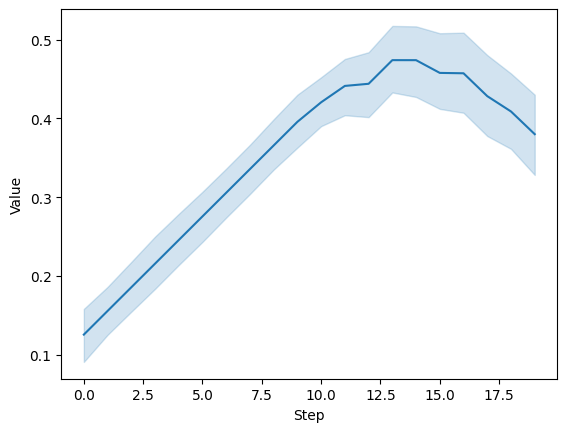

In [14]:
g = sns.lineplot(
    data=result_long.loc[result_long['Variable']=='Worry'],
    x="Step",
    y="Value",
    errorbar=("ci", 95),
    palette="tab10",
)

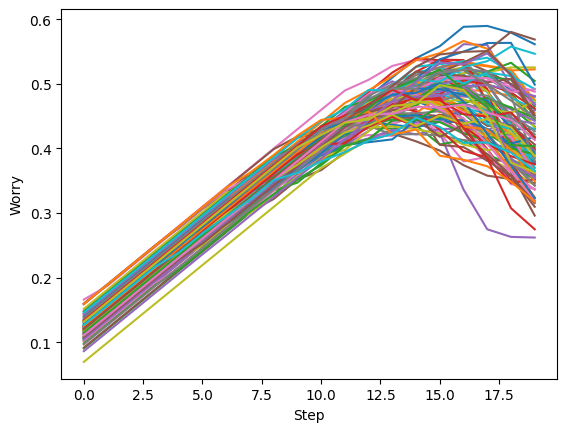

In [15]:
for run in result:
    sns.lineplot(run['Worry'].groupby('Step').mean())

In [16]:
result[0]['Worry'].groupby('Step').mean()

Step
0     0.125602
1     0.155602
2     0.185602
3     0.215602
4     0.245602
5     0.275602
6     0.305602
7     0.335602
8     0.365602
9     0.395602
10    0.420389
11    0.441152
12    0.443851
13    0.473851
14    0.473825
15    0.457661
16    0.457174
17    0.428174
18    0.408710
19    0.379927
Name: Worry, dtype: float64

In [17]:
import pandas as pd

In [18]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry 
agent_data['Age'].describe()
agent_data.iloc[-50:-1]['FloodDamageActual'].sum()
#agent_data.to_csv('I=55000')

13.328734326591354

In [19]:
I_4000= pd.read_csv('I=40000')
I_4500 = pd.read_csv('I=45000')
I_5000 = pd.read_csv('I=50000')
I_5500 = pd.read_csv('I=55000')


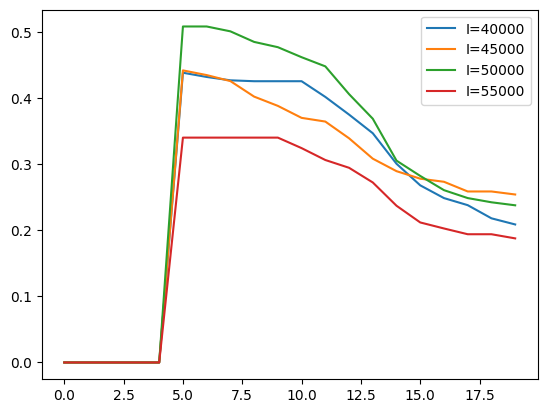

In [20]:
plt.plot(I_4000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=40000')
plt.plot(I_4500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=45000')
plt.plot(I_5000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=50000')
plt.plot(I_5500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=55000')
plt.legend()

In [21]:
agent_data.iloc[-50:-1]['Self_Investment'].mean() #average of self_investment of all agent

0.45714285714285713

In [22]:
agent_data.iloc[-50:-1]['Cum_Invest'].mean() #average of cumulative neighbor investment of all agents
#lower value probably because some agent do not have neighbors

1.8

In [23]:
agent_data.iloc[-50:-1]['Costs'].mean()

0.45999999999999996

In [24]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Cumulative Neighbour Invest over Time')

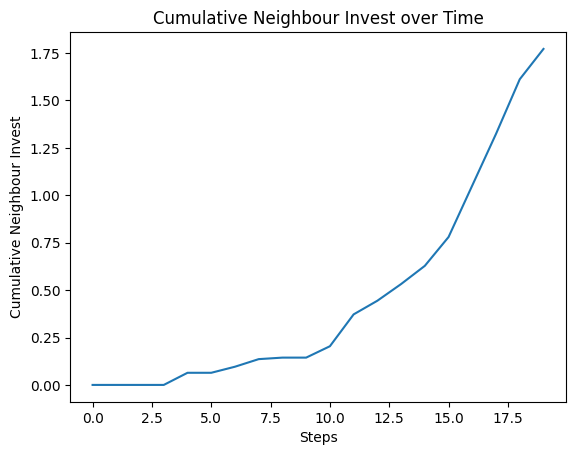

In [25]:
plt.plot(steps, agent_data.groupby(by='Step')['Cum_Invest'].mean(), label = 'Cumulative Neighbour Invest')
plt.ylabel('Cumulative Neighbour Invest')
plt.xlabel('Steps')
plt.title('Cumulative Neighbour Invest over Time')

Text(0.5, 1.0, 'Self Adaptation')

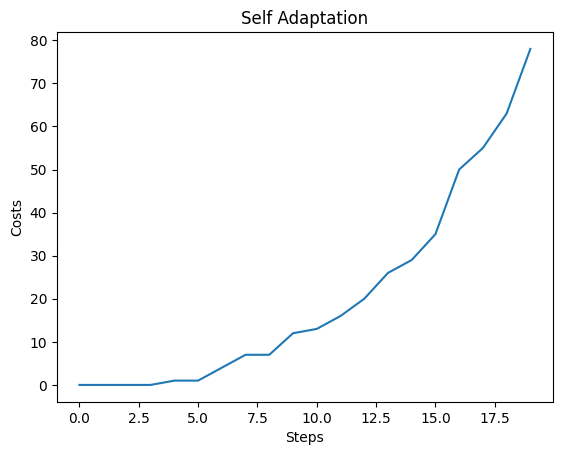

In [26]:
plt.plot(steps, agent_data.groupby(by='Step')['Self_Adaption'].sum(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Self Adaptation')

Text(0.5, 1.0, 'Costs over Time')

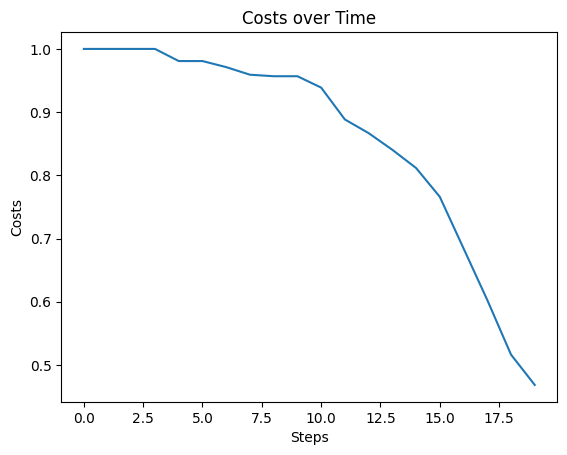

In [27]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

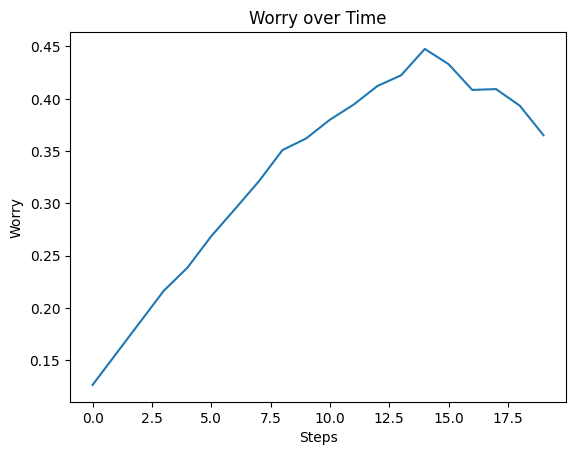

In [28]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

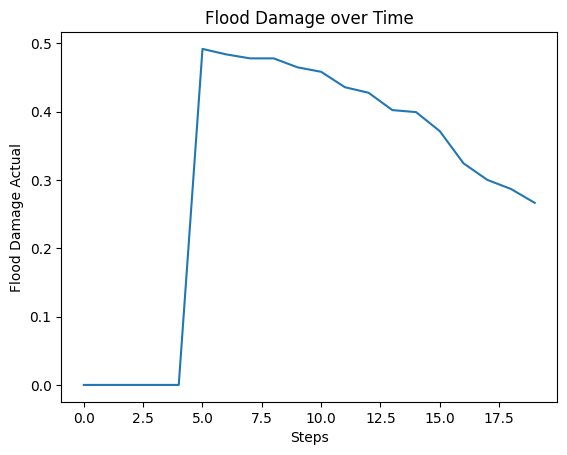

In [29]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

In [30]:
import pandas as pd

In [31]:
#I_50000 = agent_data.groupby(by='Step')['Worry'].mean()
I_45000 = agent_data.groupby(by='Step')['Worry'].mean()
#I_55000 = agent_data.groupby(by='Step')['Worry'].mean()

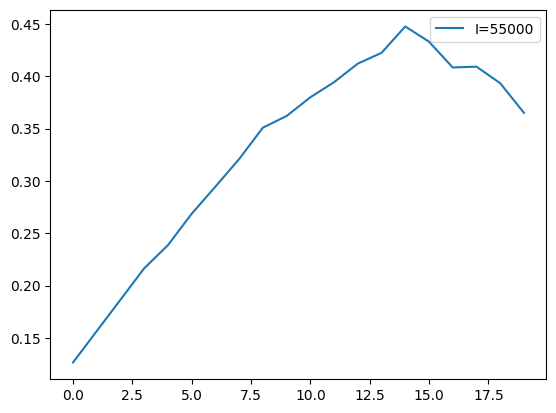

In [32]:
#plt.plot(I_50000, label='I=50000')
#plt.plot(I_45000, label='I=45000')
plt.plot(agent_data.groupby(by='Step')['Worry'].mean(), label='I=55000')
plt.legend()

Text(0.5, 1.0, 'Flood measurement active (Step10)')

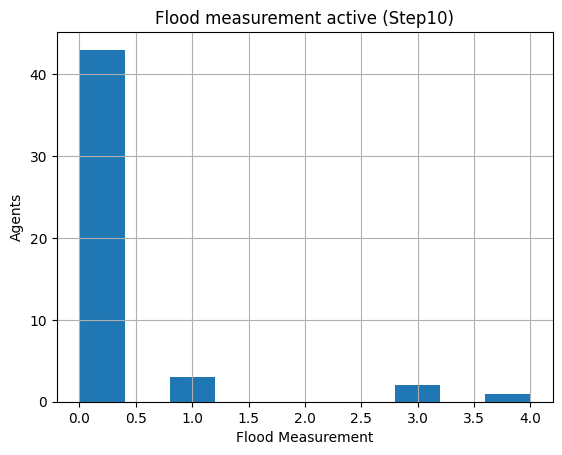

In [33]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

Text(0.5, 1.0, 'Flood measurement active (Step19)')

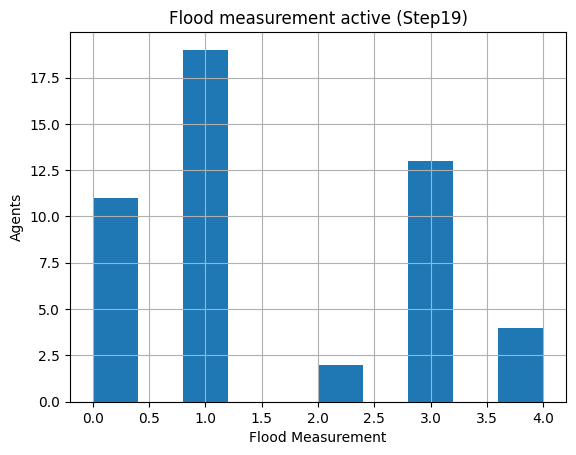

In [34]:
agent_data.iloc[-50:-1]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step19)')

<Axes: xlabel='Step'>

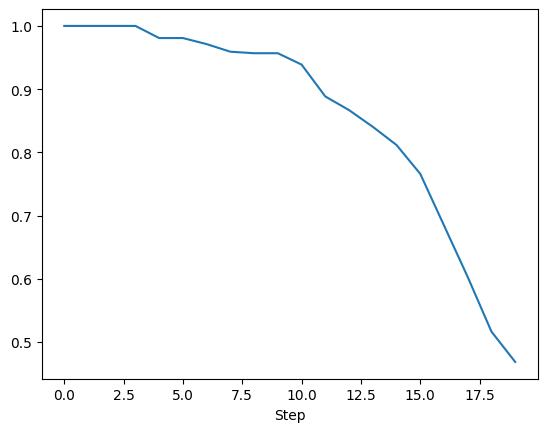

In [35]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [36]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   2.152759              0.782175          1.171957   
     1                   0.962555              0.641637          0.749773   
     2                   1.606174              0.731035          1.887657   
     3                   0.195616              0.363422          0.159708   
     4                   0.174719              0.343697          0.160866   
     5                   0.000000              0.000000          0.000000   
     6                   1.260052              0.688659          1.200492   
     7                   1.487818              0.717670          1.391253   
     8                   3.041004              0.842488          2.117986   
     9                   1.279175              0.691289          1.198454   
     10                  0.000000              0.000000          0.000000   
     11                  0.556499              0.545969          0.336818   
     12                 17.649239              1.000000         16.860328   
     13                  0.354836              0.467397          0.303322   
     14                  0.813448              0.612250          0.882808   
     15                  1.732109              0.744215          0.975084   
     16                  0.000000              0.000000          0.000000   
     17                  0.672064              0.578914          0.383006   
     18                  1.003080              0.648837          0.613760   
     19                  1.255592              0.688040          1.167403   
     20                  0.316051              0.447187          0.163330   
     21                  0.282726              0.427732          0.240378   
     22                  1.330238              0.698124          0.724618   
     23                  2.946552              0.836979          1.681275   
     24                  1.040448              0.655223          1.065150   
     25                  1.815023              0.752379          1.130259   
     26                  0.276455              0.423815          0.165555   
     27                  0.232077              0.393264          0.258836   
     28                  7.935577              1.000000          9.470895   
     29                  0.175064              0.344041          0.174204   
     30                  0.000000              0.000000          0.000000   
     31                  0.292598              0.433724          0.202946   
     32                  0.430857              0.501290          0.395979   
     33                  0.465818              0.514913          0.256391   
     34                 14.283709              1.000000         13.621047   
     35                  0.895927              0.629112          0.860304   
     36                  0.296318              0.435930          0.342608   
     37                  1.300920              0.694232          1.461963   
     38                  0.951876              0.639689          0.544260   
     39                  0.166019              0.334779          0.164360   
     40                  0.724073              0.591928          0.719931   
     41                  0.208479              0.374542          0.160889   
     42                  0.991890              0.646878          0.680544   
     43                  0.759399              0.600245          0.868853   
     44                  0.000000              0.000000          0.000000   
     45                  0.324381              0.451729          0.347767   
     46                  0.000000              0.000000          0.000000   
     47                  0.377650              0.478277          0.299085   
     48                  1.336281              0.698915          1.572253   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

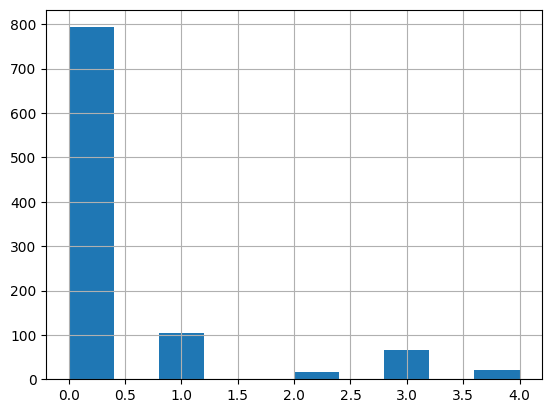

In [37]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [38]:
agent_data['FriendsCount']

Step  AgentID
0     0          3
      1          4
      2          5
      3          4
      4          3
                ..
19    45         5
      46         3
      47         2
      48         6
      49         3
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

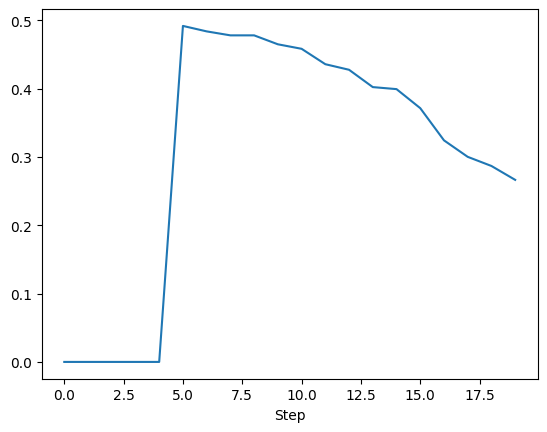

In [39]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

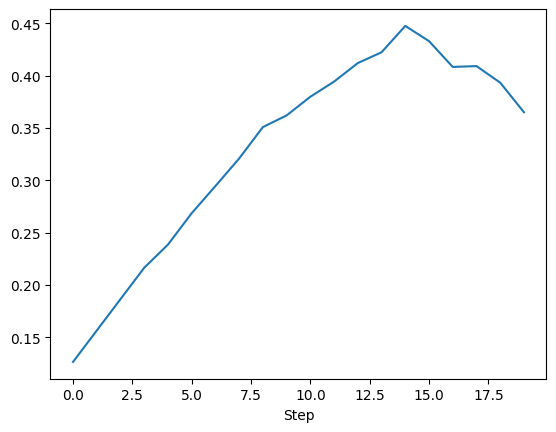

In [40]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [41]:
agent_data.groupby(by='Step')['Self_Investment'].mean()


Step
0     0.000
1     0.000
2     0.000
3     0.000
4     0.016
5     0.016
6     0.024
7     0.032
8     0.032
9     0.052
10    0.068
11    0.096
12    0.120
13    0.156
14    0.164
15    0.220
16    0.300
17    0.340
18    0.388
19    0.448
Name: Self_Investment, dtype: float64

In [42]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.2927554307558164

In [43]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.46783606500942204

In [44]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.4879178842814515

In [45]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,0
2,0
3,0
4,1
5,1
6,2
7,3
8,3
9,5
